## Pre-processing the Data into a CSV

**Imports**

In [3]:
import time
import math
import pandas as pd
import cv2
import galsim
import numpy as np
import matplotlib.pyplot as plt 
from skimage import filters
from sklearn import preprocessing

In [4]:
# Loading in image data
sample_images_0 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_0.npz")['data']
sample_images_1 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_1.npz")['data']
sample_images_2 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_2.npz")['data']
sample_images_3 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_3.npz")['data']
sample_images_4 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_4.npz")['data']
sample_images_5 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_5.npz")['data']
sample_images_6 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_6.npz")['data']
sample_images_7 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_7.npz")['data']
#sample_images_8 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_difference_images_8.npz")['data']

In [4]:
#loading in information of images
sample_information_0 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_0.npz",allow_pickle=True)
sample_information_1 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_1.npz",allow_pickle=True)
sample_information_2 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_2.npz",allow_pickle=True)
sample_information_3 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_3.npz",allow_pickle=True)
sample_information_4 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_4.npz",allow_pickle=True)
sample_information_5 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_5.npz",allow_pickle=True)
sample_information_6 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_6.npz",allow_pickle=True)
sample_information_7 = np.load("/usr/workspace/UCM_2021/challenge_setup/asteroid_injected_information_7.npz",allow_pickle=True)

Each image has information stored as so: The first input is the original difference image and PSF Image
that was pulled from the zwicky transient facility you can look at later, the second input is a pandas dataframe of where you can find all 20 synthetically injected satellites as shown below

['./Data/sci/2019/1118/190706/ztf_20191118190706_000555_zg_c07_o_q3_diffimgpsf.fits',
 './Data/sci/2019/1118/190706/ztf_20191118190706_000555_zg_c07_o_q3_scimrefdiffimg.fits.fz']

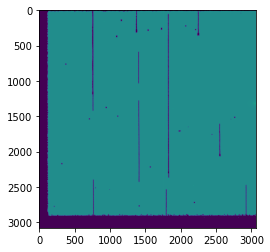

In [43]:
#Information of the first sample image from the Zwicky Transient Facility
plt.imshow(sample_images_0[0])
sample_information_0['data'][0]

In [4]:
#Information of the magnitude, length, angle and box of the injected asteroid streaks
sample_information_0['data'][1]

,magnitude,length,angle,box
0,16.104747,1,228.358088,"galsim.BoundsI(2139,2240,1925,2026)"
1,18.222819,3,165.819034,"galsim.BoundsI(2131,2234,476,579)"
2,15.979216,1,281.243538,"galsim.BoundsI(812,913,1147,1248)"
3,18.184195,2,95.195193,"galsim.BoundsI(2352,2454,1006,1108)"
4,16.298675,3,356.967492,"galsim.BoundsI(2080,2183,466,569)"
5,16.305862,2,56.170222,"galsim.BoundsI(1654,1756,2119,2221)"
6,16.967739,1,211.522894,"galsim.BoundsI(1543,1644,1406,1507)"
7,18.127119,1,270.145747,"galsim.BoundsI(2707,2808,1119,1220)"
8,15.172116,2,153.090408,"galsim.BoundsI(2140,2242,2428,2530)"
9,17.504909,3,295.527269,"galsim.BoundsI(1139,1242,2915,3018)"


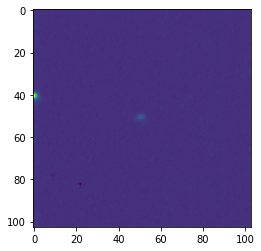

In [129]:
box_values_ast_0 = sample_information_0['data'][1]['box'][1]
plt.imshow(sample_images_0[0][box_values_ast_0.ymin:box_values_ast_0.ymax,box_values_ast_0.xmin:box_values_ast_0.xmax])

Lets try to zoom in a bit more

In [28]:
box_values_ast_0 = sample_information_0['data'][1]['box'][1]
sample_images_0[0][box_values_ast_0.ymin+40:box_values_ast_0.ymax-40,box_values_ast_0.xmin+40:box_values_ast_0.xmax-40]

array([[-1.40902901e+00,  2.16059875e+00, -6.84212685e+00,
        -3.53490472e-01, -9.72865868e+00,  1.47804594e+00,
         1.41977596e+00, -3.52093652e-02,  6.86281300e+00,
         4.38005400e+00, -6.40612030e+00,  9.37628269e-01,
         5.03502786e-01,  4.55860424e+00,  4.75758839e+00,
         5.60699463e-01,  1.22286224e+00,  8.16022205e+00,
        -3.67024970e+00, -1.35778278e-01, -8.91524673e-01,
         4.69846487e+00,  2.44322848e+00],
       [-7.36354876e+00, -5.93830645e-01, -6.95632339e-01,
        -2.90112019e+00,  2.08518195e+00,  7.86230946e+00,
         7.04667717e-03, -6.65871799e-03, -1.30282784e+01,
         3.27230287e+00, -3.37755799e+00, -6.50024509e+00,
         1.88313079e+00,  2.15623779e+01, -1.53437500e+01,
        -7.49391222e+00,  6.27159691e+00,  5.35906672e-01,
         6.59344625e+00, -6.31240463e+00,  4.80538225e+00,
         5.98974288e-01,  6.34012365e+00],
       [-3.59593511e+00, -3.54695821e+00,  5.69872141e+00,
         2.27986336e+00,  1.6

Aha! There it is, but lets see if we normalize the data by subtracting the minimum value and taking a logarithm to see if we get a better picture

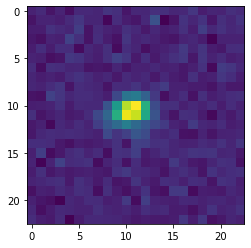

In [128]:
sample_images_0_normalized = np.log10(sample_images_0[0]-np.min(sample_images_0[0])+10**-8)
plt.imshow(sample_images_0_normalized[box_values_ast_0.ymin+40:box_values_ast_0.ymax-40,box_values_ast_0.xmin+40:box_values_ast_0.xmax-40])

## Obtaining Images from Asteroid Images

In [13]:
data=[]
def store_images(information, images):
    for j in np.arange(100): #look into parfor
        for i in np.arange(20):
            unwritten = 0
            box_values_ast = information['data'][2*j+1]['box'][i]
            temp = images[j][box_values_ast.ymin:box_values_ast.ymax,box_values_ast.xmin:box_values_ast.xmax]
            temp = temp[41:62, 41:62].flatten().tolist()
            if unwritten == 0:
                data.append(temp)
                unwritten = 1

begin = time.time()
store_images(sample_information_0, sample_images_0)
store_images(sample_information_1, sample_images_1)
store_images(sample_information_0, sample_images_2)
store_images(sample_information_1, sample_images_3)
store_images(sample_information_0, sample_images_4)
store_images(sample_information_1, sample_images_5)
store_images(sample_information_0, sample_images_6)
store_images(sample_information_1, sample_images_7)
end = time.time()

print("It took {} seconds".format(end-begin))

It took 1296.6758785247803 seconds


In [14]:
print(np.array(data).shape)

(16000, 441)


In [15]:
pixel_columns= []
labels = [1]*16000
for i in range(21*21): #100*100
    pixel_columns.append("Pixel_{}".format(i))

In [16]:
df = pd.DataFrame(data, columns=pixel_columns)

In [17]:
df.insert(0, "Labels", labels)

In [18]:
df.to_csv("Asteroid.csv", index=False)

In [8]:
not_asteroid = []
def non_asteroid(sample_images):
    for i in range(len(sample_images)): 
        cropped = sample_images[i][200:2800,500:] #removed the borders caused by ZTF
        p1=cropped[500:521,:] #one slice of the image all the way to the end
#         p1_normalized = preprocessing.normalize(p1) #normalized the data
#         gaussian_blur = np.ones((5,5),np.float32)/25 #blurring kernel
#         p1_blurred = cv2.filter2D(p1_normalized,-1,gaussian_blur) #blurred image
        # thresh = cv2.threshold(p1_blurred, 5e-100, 255, cv2.THRESH_BINARY)[1]

        #Rolling window, Traversing through an image
        # in total 2100 per sample image, 16,800 images overall
        for s in np.arange(0,2100,100): #cutoff at 2100 with a stride of 5 pixels to get 21 pictures from one image
            mat1 = p1[:, s:s+21].flatten().tolist()
            not_asteroid.append(mat1)

In [9]:
non_asteroid(sample_images_0)
non_asteroid(sample_images_1)
non_asteroid(sample_images_2)
non_asteroid(sample_images_3)
non_asteroid(sample_images_4)
non_asteroid(sample_images_5)
non_asteroid(sample_images_6)
non_asteroid(sample_images_7)

In [10]:
print(np.array(not_asteroid).shape)

(16800, 441)


In [ ]:
pixel_columns_NA= []
labels_NA = [0]*16800
for i in range(21*21): #100*100
    pixel_columns_NA.append("Pixel_{}".format(i))
    
df_NA = pd.DataFrame(not_asteroid, columns=pixel_columns_NA)
df_NA.insert(0, "Labels", labels_NA)
df_NA.to_csv("Not_Asteroids.csv", index=False)

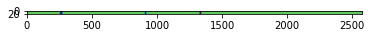

In [6]:
cropped = sample_images_0[0][200:2800,500:]
p1=cropped[500:521,:]
plt.imshow(p1)